# Team Information : 
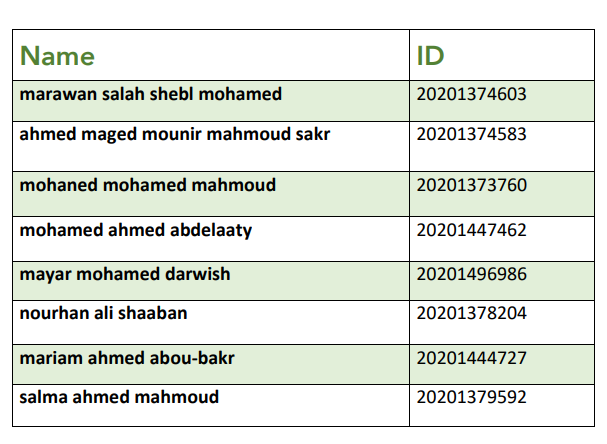


# Table of Content :

# Importing libraries


In [2]:
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time

# Load Data 

In [3]:
#download the treebank corpus from nltk
nltk.download('treebank')
#download the universal tagset from nltk
nltk.download('universal_tagset')
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Noura\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Noura\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


# Display Data :


In [4]:
#print the first two sentences along with tags
print(nltk_data[:2])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


# Print each word with its respective tag for first two sentences

In [5]:
for sent in nltk_data[:2]:
    for tuple in sent:
        print(tuple)

('Pierre', 'NOUN')
('Vinken', 'NOUN')
(',', '.')
('61', 'NUM')
('years', 'NOUN')
('old', 'ADJ')
(',', '.')
('will', 'VERB')
('join', 'VERB')
('the', 'DET')
('board', 'NOUN')
('as', 'ADP')
('a', 'DET')
('nonexecutive', 'ADJ')
('director', 'NOUN')
('Nov.', 'NOUN')
('29', 'NUM')
('.', '.')
('Mr.', 'NOUN')
('Vinken', 'NOUN')
('is', 'VERB')
('chairman', 'NOUN')
('of', 'ADP')
('Elsevier', 'NOUN')
('N.V.', 'NOUN')
(',', '.')
('the', 'DET')
('Dutch', 'NOUN')
('publishing', 'VERB')
('group', 'NOUN')
('.', '.')


# split data into training and validation set in the ratio 80:20


In [6]:
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)

> - train_set ,  test_set are nested  list each sublist express for a sentence and elements of sublist are the words of these sentence 

In [7]:
train_set[0] # first Sentenence (Drink Carrier Competes With Cartons)

[('Drink', 'NOUN'),
 ('Carrier', 'NOUN'),
 ('Competes', 'VERB'),
 ('With', 'ADP'),
 ('Cartons', 'NOUN')]

In [8]:
train_set[1] # second Sentenence 

[('At', 'ADP'),
 ('last', 'ADJ'),
 ('count', 'NOUN'),
 (',', '.'),
 ('Candela', 'NOUN'),
 ('had', 'VERB'),
 ('sold', 'VERB'),
 ('$', '.'),
 ('4', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('of', 'ADP'),
 ('its', 'PRON'),
 ('medical', 'ADJ'),
 ('devices', 'NOUN'),
 ('in', 'ADP'),
 ('Japan', 'NOUN'),
 ('.', '.')]

# create list of train and test tagged words


In [9]:
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]

In [10]:
print("Total number of tagged words we use in train : ",len(train_tagged_words))
print("Total number of tagged words we use in test the model : ",len(test_tagged_words))

Total number of tagged words we use in train :  80310
Total number of tagged words we use in test the model :  20366


> - train_tagged_words and test_tagged_words are list of tuples , tuple elements are the word and its category 

In [11]:
train_tagged_words[0] #first word is Drink and it is a noun 

('Drink', 'NOUN')

In [12]:
train_tagged_words[10]  # tenth word is had and it a verb 

('had', 'VERB')

In [13]:
train_tagged_words[:5]

[('Drink', 'NOUN'),
 ('Carrier', 'NOUN'),
 ('Competes', 'VERB'),
 ('With', 'ADP'),
 ('Cartons', 'NOUN')]

#  check how many unique tags are present in training data


In [14]:
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
# {} refer to set which get the unique value only 

12
{'ADJ', 'ADV', 'NUM', 'ADP', 'X', 'NOUN', 'CONJ', 'PRON', 'VERB', 'DET', 'PRT', '.'}


# check total words in vocabulary


In [15]:
vocab = {word for word,tag in train_tagged_words}
print("we have ",len(vocab),"words to train the model with ")

we have  11052 words to train the model with 


# Some important Calculations we will use in the following methods : 

## 1- Calculate number of times does specific word classified as certain tag

In [16]:
tag_list = [pair for pair in train_tagged_words if pair[1]=="NOUN"] 
w_given_tag_list = [pair[0] for pair in tag_list if pair[0]=="Candela"]
print(w_given_tag_list)
print("number of times does candela classified as NOUN is ",len(w_given_tag_list))

['Candela', 'Candela', 'Candela', 'Candela', 'Candela']
number of times does candela classified as NOUN is  5


# 2- Calculate number of times does a specicfic tag come in trian data :


In [17]:
tag_list = [pair for pair in train_tagged_words if pair[1]=="X"]  # get all the words whose tags are tag 
count_tag = len(tag_list)  #total number of times the passed tag occurred in train_bag
print("tag X has come in train data about ",count_tag,"times")

tag_list = [pair for pair in train_tagged_words if pair[1]=="NOUN"]  # get all the words whose tags are tag 
count_tag = len(tag_list)  #total number of times the passed tag occurred in train_bag
print("tag NOUN has come in train data about ",count_tag,"times")


 

tag X has come in train data about  5203 times
tag NOUN has come in train data about  22966 times


# Compute Emission Probability

In [18]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    
    #total number of times the passed tag occurred in train_bag
    tag_list = [pair for pair in train_bag if pair[1]==tag]  # get all the words whose tags are tag 
    count_tag = len(tag_list)  
    
    #now calculate the total number of times the passed word occurred as the passed tag.
    word_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(word_given_tag_list)
     
    return (count_w_given_tag, count_tag)



> # Explaination for the word_given_tag method : 
>- ## tag_list get all the words whose tags are tag  
     - ### assume tag=PRON , the when printing tag_list the output will be as the following  :

> 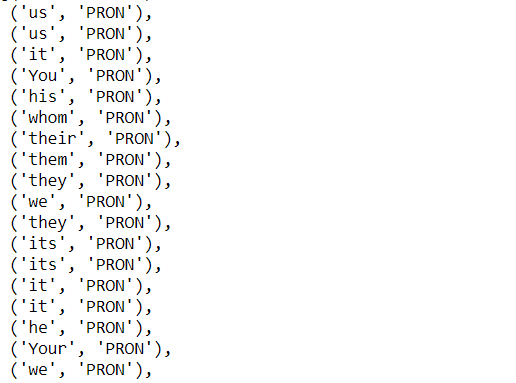



>- ## w_given_tag_list add to the list  the given word (n) times where (n) is the count_w_given_tag represent the length of the list
     - ### if tag = NOUN , WORD = Candela , so how many times does candela is categorized as NOUN ?
        (What is number of times the word added to the list )

>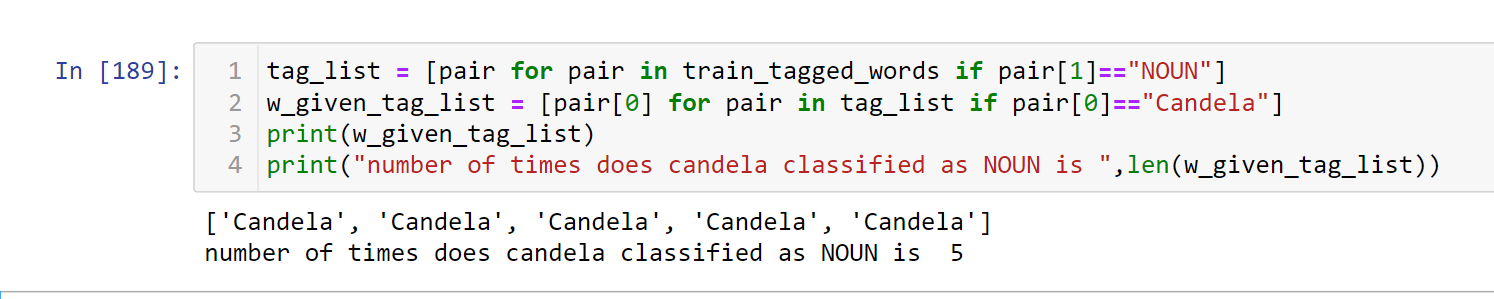 

> ## What we will made with return (count_w_given_tag, count_tag)
> ## when calling the method we will get the emission probaiblity by use the following rule 
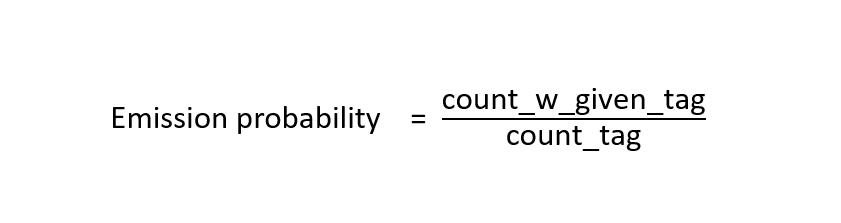
> ### By knowing that count_w_given_tag is (o) index and count_tag is (1) index in the return tuple 

### simple example to get the emission probability : 

In [19]:
# word = candela , tag = NOUN 
pair=word_given_tag("Candela", "NOUN")
emission_p = pair[0]/pair[1]
print("the emission probability that candela be noun is ", emission_p)

the emission probability that candela be noun is  0.00021771314116520073


# Compute  Transition Probability


In [20]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    
    # get how many times does t1 appear 
    tags = [pair[1] for pair in train_bag] # get total tags transactions which are (80310) not unique 
    count_t1 = len([t for t in tags if t==t1]) # only count how many times does the tag t1 come in 80310 trasactions 
    
    # get transaction does t2 come after t2 by one step differnce 
    # t2 is the future , t1 is the present , no other history used 
    
    count_t2_t1 = 0 # counter will count how many times does t2 come after t2 by one step 
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2: 
        #if only the given t2 come after the given t1 the condition will be true other wise will ignore increment 
            count_t2_t1 += 1 # increment counter     
    return (count_t2_t1, count_t1)

> # Explaination for the t2_given_t1 method : 
>- ## t1 and t2 refer to the states , we will need to caclulate p( t2 | t1 ) 
> 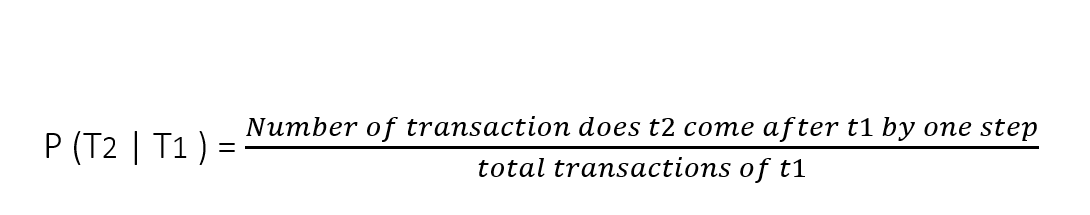
> ### what we will benefit from  return (count_t2_t1, count_t1) , 
>> ### we will compute count_t2_t1 /count_t1 when calling the method to get p( t2 | t1 ) 
>> #### By knowing that count_t2_t1 is index (0) and count_t1 is index (1) in the return tuple



### simple example to get Transition probability :


In [21]:
pair= t2_given_t1("NOUN", "PRON")
Transition_prob = pair[0]/pair[1]
print(" the one step Transition probability between NOUN and PRON is where PRON is t1 and NOUN is t2  ", Transition_prob)

 the one step Transition probability between NOUN and PRON is where PRON is t1 and NOUN is t2   0.21275626423690205


# Create the transition Matrix between all tags:

In [22]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[6.33009672e-02 5.24271838e-03 2.17475723e-02 8.05825219e-02
  2.09708735e-02 6.96893215e-01 1.68932043e-02 1.94174761e-04
  1.14563107e-02 5.24271838e-03 1.14563107e-02 6.60194159e-02]
 [1.30721495e-01 8.14584941e-02 2.98681147e-02 1.19472459e-01
  2.28859577e-02 3.21955010e-02 6.98215654e-03 1.20248254e-02
  3.39022487e-01 7.13731572e-02 1.47401085e-02 1.39255241e-01]
 [3.53445187e-02 3.57015361e-03 1.84219927e-01 3.74866128e-02
  2.02427700e-01 3.51660132e-01 1.42806144e-02 1.42806140e-03
  2.07068902e-02 3.57015361e-03 2.60621198e-02 1.19243130e-01]
 [1.07061505e-01 1.45532778e-02 6.32751212e-02 1.69577319e-02
  3.45482156e-02 3.23588967e-01 1.01240189e-03 6.96026310e-02
  8.47886596e-03 3.20931405e-01 1.26550242e-03 3.87243740e-02]
 [1.76821072e-02 2.57543717e-02 3.07514891e-03 1.42225638e-01
  7.57255405e-02 6.16951771e-02 1.03786280e-02 5.41995019e-02
  2.06419379e-01 5.68902567e-02 1.85085520e-01 1.60868734e-01]
 [1.25838192e-02 1.68945398e-02 9.14395228e-03 1.76826611e-01
  2

In [23]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))

In [24]:
tags_df

,ADJ,ADV,NUM,ADP,X,NOUN,CONJ,PRON,VERB,DET,PRT,.
ADJ,0.063301,0.005243,0.021748,0.080583,0.020971,0.696893,0.016893,0.000194,0.011456,0.005243,0.011456,0.066019
ADV,0.130721,0.081458,0.029868,0.119472,0.022886,0.032196,0.006982,0.012025,0.339022,0.071373,0.014740,0.139255
NUM,0.035345,0.003570,0.184220,0.037487,0.202428,0.351660,0.014281,0.001428,0.020707,0.003570,0.026062,0.119243
ADP,0.107062,0.014553,0.063275,0.016958,0.034548,0.323589,0.001012,0.069603,0.008479,0.320931,0.001266,0.038724
X,0.017682,0.025754,0.003075,0.142226,0.075726,0.061695,0.010379,0.054200,0.206419,0.056890,0.185086,0.160869
NOUN,0.012584,0.016895,0.009144,0.176827,0.028825,0.262344,0.042454,0.004659,0.149134,0.013106,0.043935,0.240094
CONJ,0.113611,0.057080,0.040615,0.055982,0.009330,0.349067,0.000549,0.060373,0.150384,0.123491,0.004391,0.035126
PRON,0.070615,0.036902,0.006834,0.022323,0.088383,0.212756,0.005011,0.006834,0.484738,0.009567,0.014123,0.041913
VERB,0.066390,0.083886,0.022836,0.092357,0.215930,0.110589,0.005433,0.035543,0.167956,0.133610,0.030663,0.034807
DET,0.206411,0.012074,0.022855,0.009918,0.045134,0.635906,0.000431,0.003306,0.040247,0.006037,0.000287,0.017393


# Viterbi Algorithm :


> ## it is a decoding method which will take untagged  words (hidden tags ) as input and will classify each word to a tag
>> ### AHMED will classify as NOUN while play will classify as verb where noun and verb are tags

# steps of the algorithm :
> ## for each word : 
> ## loop on all tags and do the following 
> ### 1- get transition probability from matrix or from method 
        >> ### - intailly deal with (.) as the intial tag an get all transition probaility of (.) with other tags at iteartion 0 
        >> ### - other iterations will get ( state[-1]) ( the last classified tag in the previous iteration ) and get all transition probailties with other tags 
> ### 2- get emission probability from  word_given_tag method with each tag and the target word 
> ### 3- get probability = transition probability * emission probability
> ### 4- Append probability value it in p 
> ### 5- get max from p 
> ### 6 - assign the word to the state with the maximum probability 
> ### 7- iterate again on an new word 

In [25]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))

    for key, word in enumerate(words):
        print("new un tagged word is ",words[key])
        print("iteration",key)
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T :
            print("sub iteration ",key)
            print("tag is ",tag)
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1] , tag]
                print("states[-1] is :",state[-1])
           
                 
            # compute emission and state probabilities
         
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            state_probability = emission_p * transition_p  
            p.append(state_probability)
            print("proba is ", state_probability)
           
        print("probailities ",p)     
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)]
   
        print("max is ",state_max)
        state.append(state_max)
        print("states list now is ",state ," we will take ",state[-1],"in the next iteration")
        print(" ")
    return list(zip(words, state))

# Sample iterations output : 

> ### outer for loop :  
--------------------------------------------------------------------------------------------------------------------------
> ### Itearion 0 
---------------------------------------------------------------------------------------------------------------------------
> ### inner for loop : 
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  PRON
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ### sub iteration  0
> ### tag is  CONJ
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ### sub iteration  0
> ### tag is  X
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ### sub iteration  0
> ### tag is  DET
> ### word is  The
> ### proba is  0.0007604801903114813
---------------------------------------------------------------------------------------------------------------------------
> ### sub iteration  0
> ### tag is  PRT
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ### sub iteration  0
> ### tag is  NOUN
> ### word is  The
> ### proba is  3.705586714787339e-05
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  VERB
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  ADP
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  ADJ
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  NUM
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  ADV
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------

> ### sub iteration  0
> ### tag is  .
> ### word is  The
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ## all probabilites 
> #### probailities  [0.0, 0.0, 0.0, 0.0007604801903114813, 0.0, 3.705586714787339e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
> ## our state in iteration 0 is DET for the word the as it is the mmaximum probability 
> ## max is  DET
> ## state list  now have ['DET']




> ### increment outer for loop :  
--------------------------------------------------------------------------------------------------------------------------
> ### Itearion 1
> ### un tagged word is  company

---------------------------------------------------------------------------------------------------------------------------
> ### increment inner for loop : 
---------------------------------------------------------------------------------------------------------------------------
> ### sub iteration  1
> ### tag is  ADJ
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  ADV
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  NUM
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  ADP
> ###  states[-1] is : DET
> ### proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  X
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  NOUN
> ###  states[-1] is : DET
> ###  proba is  0.005565495170970147
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  CONJ
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  PRON
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  VERB
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  DET
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  PRT
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ###  sub iteration  1
> ###  tag is  .
> ###  states[-1] is : DET
> ###  proba is  0.0
---------------------------------------------------------------------------------------------------------------------------
> ## all probabilites 
> ### probailities  [0.0, 0.0, 0.0, 0.0, 0.0, 0.005565495170970147, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
> ### max probability when tag  is  NOUN , word is classified as Noun 

> ###  state list  now is ['DET', 'NOUN'] we will take NOUN as state[-1] in the next iteration 

#  Let's test our Viterbi algorithm on a few sample sentences of test dataset


In [26]:
random.seed(1234)      #define a random seed to get same sentences when run multiple times
 
# choose random 10 numbers
rndom = [random.randint(1,len(test_set)) for x in range(10)]
 
# list of 10 sents on which we test the model
test_run = [test_set[i] for i in rndom]
 
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
 
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [27]:
#Here We will only test 10 sentences to check the accuracy
#as testing the whole training set takes huge amount of time
start = time.time()
tagged_seq = Viterbi(test_tagged_words)

un tagged word is  The
iteration 0
sub iteration  0
tag is  ADJ
proba is  0.0
sub iteration  0
tag is  ADV
proba is  0.0
sub iteration  0
tag is  NUM
proba is  0.0
sub iteration  0
tag is  ADP
proba is  0.0
sub iteration  0
tag is  X
proba is  0.0
sub iteration  0
tag is  NOUN
proba is  3.8063010718466816e-05
sub iteration  0
tag is  CONJ
proba is  0.0
sub iteration  0
tag is  PRON
proba is  0.0
sub iteration  0
tag is  VERB
proba is  0.0
sub iteration  0
tag is  DET
proba is  0.01368723316869123
sub iteration  0
tag is  PRT
proba is  0.0
sub iteration  0
tag is  .
proba is  0.0
probailities  [0.0, 0.0, 0.0, 0.0, 0.0, 3.8063010718466816e-05, 0.0, 0.0, 0.0, 0.01368723316869123, 0.0, 0.0]
max is  DET
['DET']
un tagged word is  company
iteration 1
sub iteration  1
tag is  ADJ
states[-1] is : DET
proba is  0.0
sub iteration  1
tag is  ADV
states[-1] is : DET
proba is  0.0
sub iteration  1
tag is  NUM
states[-1] is : DET
proba is  0.0
sub iteration  1
tag is  ADP
states[-1] is : DET
proba i

In [28]:
tagged_seq

[('The', 'DET'),
 ('company', 'NOUN'),
 ('is', 'VERB'),
 ('contesting', 'ADJ'),
 ('the', 'DET'),
 ('fine', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('I', 'PRON'),
 ("'m", 'VERB'),
 ('starting', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('see', 'VERB'),
 ('more', 'ADV'),
 ('business', 'NOUN'),
 ('transactions', 'NOUN'),
 (',', '.'),
 ("''", '.'),
 ('says', 'VERB'),
 ('*T*-2', 'X'),
 ('Andrea', 'ADJ'),
 ('West', 'NOUN'),
 ('of', 'ADP'),
 ('American', 'ADJ'),
 ('Telephone', 'NOUN'),
 ('&', 'CONJ'),
 ('Telegraph', 'NOUN'),
 ('Co.', 'NOUN'),
 (',', '.'),
 ('*-3', 'X'),
 ('noting', 'VERB'),
 ('growing', 'VERB'),
 ('interest', 'NOUN'),
 ('in', 'ADP'),
 ('use', 'NOUN'),
 ('of', 'ADP'),
 ('900', 'NUM'),
 ('service', 'NOUN'),
 ('for', 'ADP'),
 ('stock', 'NOUN'),
 ('sales', 'NOUN'),
 (',', '.'),
 ('software', 'NOUN'),
 ('tutorials', 'ADJ'),
 ('and', 'CONJ'),
 ('even', 'ADV'),
 ('service', 'NOUN'),
 ('contracts', 'NOUN'),
 ('.', '.'),
 ('He', 'PRON'),
 ('added', 'VERB'),
 (',', '.'),
 ('``', '.'),
 ('T

In [29]:
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)

Time taken in seconds:  61.613213539123535


In [30]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
 
accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Viterbi Algorithm Accuracy:  93.77990430622009
